In [1]:
import pandas as pd
import csv

In [31]:
smalldf = pd.read_csv("lasvegas.csv") #data.csv

In [4]:
#part one : global recommender

In [32]:
smalldf.columns

Index([u'Unnamed: 0', u'user_id', u'business_id', u'biz_name',
       u'business_review_count', u'business_average', u'user_name',
       u'user_review_count', u'stars', u'city', u'user_avg', u'review_id',
       u'business_avg'],
      dtype='object')

In [33]:
smalldf.drop('Unnamed: 0', axis=1, inplace=True)

In [34]:
smalldf.head(5)

,user_id,business_id,biz_name,business_review_count,business_average,user_name,user_review_count,stars,city,user_avg,review_id,business_avg
0,Yc3g0KMp3991QIC4Ot1fxQ,K0j_Znzin0jShXVnpvW86A,Jaleo,515,3.5,Jared,14,2,Las Vegas,3.285714,YpUxJ7H3JskQ-zTe5RnFIQ,3.733981
1,Q4Qfu-3vYtL1LRm2X1b0Gg,UV2Jt8slktGu14gLZeNCjA,Mint Indian Bistro,257,4.0,Albert,159,4,Las Vegas,3.094340,RKLvEr8RoW_SbkZARXk2Vg,4.136187
2,Q4Qfu-3vYtL1LRm2X1b0Gg,cJWbbvGmyhFiBpG_5hf5LA,Hofbräuhaus Las Vegas,623,3.5,Albert,159,4,Las Vegas,3.094340,7DVWEi4St40XUHSXGCr2kg,3.741573
3,Q4Qfu-3vYtL1LRm2X1b0Gg,dn_ipqbm7_jUz5X3rDez_A,Todd English P.U.B.,632,3.5,Albert,159,3,Las Vegas,3.094340,0VTpaU1BCuXY7pqupbf2Wg,3.566456
4,Q4Qfu-3vYtL1LRm2X1b0Gg,lveadz48Q0_ke_p80D2rhg,ISLA Mexican Kitchen & Tequila Bar,138,4.0,Albert,159,3,Las Vegas,3.094340,130u9Iy7Skyg7J3uZyWtrw,3.760870


In [35]:
smalldf.tail(5)

,user_id,business_id,biz_name,business_review_count,business_average,user_name,user_review_count,stars,city,user_avg,review_id,business_avg
239324,ngW9evC5dd1pLHIugxwMdg,8SWZLawwzqwzbXpGQS7gBw,Della's Kitchen,82,3.5,Katie,1,5,Las Vegas,5.0,9vCoSx7TvhQdKfg0wg2VPA,3.743902
239325,chyVlqeyehoX3_QML3vLRQ,JPfi__QJAaRzmfh5aOyFEw,Shang Artisan Noodle,70,4.5,Ann,1,4,Las Vegas,4.0,nz8fBYfoNogyvMXz1Z44Mw,4.200000
239326,JKVvXX-hdybAf0f2ZJ9vrQ,w5CSi-An5meLnxjKSFn0wQ,Thai St Cafe,92,4.0,Norases,1,5,Las Vegas,5.0,0zMzbujXQaggAQJmc7Cmww,3.554348
239327,1dPTYB_OoFNceuH_F9551Q,w5CSi-An5meLnxjKSFn0wQ,Thai St Cafe,92,4.0,Veremundo,1,1,Las Vegas,1.0,KD0eEulx_D4EPfbXCNqpqA,3.554348
239328,ZyAZbm0Di8l0ynNhxSlc7A,w5CSi-An5meLnxjKSFn0wQ,Thai St Cafe,92,4.0,Frank,1,5,Las Vegas,5.0,66pZc2AIlWLnejQIcZIQWQ,3.554348


In [36]:
len(smalldf)

239329

In [39]:
#smalldf['city'].value_counts()

#smalldf = smalldf[smalldf.city != "Las Vegas"]
#smalldf = smalldf[smalldf.city != "Phoenix"]

'''smalldf = smalldf[(smalldf.city != "Scottsdale") & (smalldf.city != "Toronto") & (smalldf.city != "Charlotte") & (smalldf.city != "Pittsburgh")]

smalldf = smalldf[(smalldf.city != "Tempe") & (smalldf.city != "Henderson") & (smalldf.city != "Chandler") & (smalldf.city != "Montréal")]

smalldf = smalldf[(smalldf.city != "Cleveland") & (smalldf.city != "Madison") & (smalldf.city != "Gilbert") & (smalldf.city != "Mesa")]

smalldf = smalldf[(smalldf.city != "Glendale") & (smalldf.city != "Markham") & (smalldf.city != "Peoria") & (smalldf.city != "Lakewood")]

smalldf = smalldf[(smalldf.city != "North Las Vegas") & (smalldf.city != "Champaign") & (smalldf.city != "Cave Creek") & (smalldf.city != "Boulder City")]

smalldf = smalldf[(smalldf.city != "Richmond Hill") & (smalldf.city != "Surprise") & (smalldf.city != "Goodyear") & (smalldf.city != "Paradise Valley")]'''

len(smalldf)

239329

In [40]:
smalldf['city'].value_counts()

Las Vegas          238111
North Las Vegas      1137
South Las Vegas        50
N. Las Vegas           31
Name: city, dtype: int64

In [41]:
%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

In [42]:
smalldf['user_review_count'].unique()

array([ 14, 159, 288, 120,  46, 141,   9,  77,  57,  34,  76,  30,  47,
         5,  39, 154,  31,  67,  12,  33,  85,  36, 173,  10,  21, 124,
        83,  73,   8,  80,  27,  54,  75,  16,   2,  78,  17,   6,  26,
         7, 228,  56, 248,   4,  98, 136,  72,  22, 174,   3,  59,  38,
        92,  55,  43,  18, 263,  29,  50,  11,  15, 328, 193,  88, 137,
       180,  65,  84,  28,  25,  60,  42, 176, 527,  37,  45,  24, 156,
        90, 149,  74,  81,  32,  58,  35, 443,  63,  51,  23, 117, 114,
       200,  41,  68, 160,  48,  86, 201, 219,  52, 116, 317,  19,  20,
        87,  69, 153,  64,  40,  13,  89, 187,  94, 143, 109, 115, 158,
        66,  70, 138,  95, 103, 107, 110,  71, 144,  49,   1, 210, 237,
       262, 121, 505, 329, 576,  91, 189,  82, 459,  61, 188,  44, 184,
       106,  62, 118, 112, 240, 142, 102,  97, 130, 171, 104, 185, 100,
       135, 113, 249,  99, 206, 111, 128, 140, 199, 172, 157,  79, 226,
       150, 155, 151, 420, 207, 293, 119, 165, 217, 145, 191, 30

In [44]:
smalldf = smalldf[(smalldf.city != "North Las Vegas") & (smalldf.city != "South Las Vegas") & (smalldf.city != "N. Las Vegas")]

In [46]:
smalldf['city'].value_counts()

Las Vegas    238111
Name: city, dtype: int64

In [48]:
def recompute_frame(ldf):
    """
    takes a dataframe ldf, makes a copy of it, and returns the copy
    with all averages and review counts recomputed
    this is used when a frame is subsetted.
    """
    ldfu=ldf.groupby('user_id')
    ldfb=ldf.groupby('business_id')
    user_avg=ldfu.stars.mean()
    user_review_count=ldfu.review_id.count()
    business_avg=ldfb.stars.mean()
    business_review_count=ldfb.review_id.count()
    nldf=ldf.copy()
    nldf.set_index(['business_id'], inplace=True)
    nldf['business_avg']=business_avg
    nldf['business_review_count']=business_review_count
    nldf.reset_index(inplace=True)
    nldf.set_index(['user_id'], inplace=True)
    nldf['user_avg']=user_avg
    nldf['user_review_count']=user_review_count
    nldf.reset_index(inplace=True)
    return nldf

In [49]:
smallidf = smalldf[(smalldf.user_review_count > 60) & (smalldf.business_review_count > 150)]
smalldf=recompute_frame(smallidf)

In [50]:
len(smalldf)

21957

In [51]:
smalldf.head(5)

,user_id,business_id,biz_name,business_review_count,business_average,user_name,user_review_count,stars,city,user_avg,review_id,business_avg
0,Q4Qfu-3vYtL1LRm2X1b0Gg,UV2Jt8slktGu14gLZeNCjA,Mint Indian Bistro,56,4.0,Albert,11,4,Las Vegas,3.636364,RKLvEr8RoW_SbkZARXk2Vg,4.214286
1,Q4Qfu-3vYtL1LRm2X1b0Gg,cJWbbvGmyhFiBpG_5hf5LA,Hofbräuhaus Las Vegas,83,3.5,Albert,11,4,Las Vegas,3.636364,7DVWEi4St40XUHSXGCr2kg,3.554217
2,Q4Qfu-3vYtL1LRm2X1b0Gg,dn_ipqbm7_jUz5X3rDez_A,Todd English P.U.B.,72,3.5,Albert,11,3,Las Vegas,3.636364,0VTpaU1BCuXY7pqupbf2Wg,3.527778
3,Q4Qfu-3vYtL1LRm2X1b0Gg,Cr4ipI-tr-R8Q0NilkWNkA,MIX,48,4.0,Albert,11,5,Las Vegas,3.636364,HxqqNenaxndZUSAw2evsUg,3.833333
4,Q4Qfu-3vYtL1LRm2X1b0Gg,Cni2l-VKG_pdospJ6xliXQ,Burger Bar,111,4.0,Albert,11,3,Las Vegas,3.636364,TMeS5fNPD53UmpL-szxdtQ,3.729730


Mean support is: 6.67400061977


(array([  7.76490000e+04,   2.00410000e+04,   5.89300000e+03,
          2.01800000e+03,   5.91000000e+02,   2.12000000e+02,
          7.80000000e+01,   5.00000000e+00,   1.00000000e+00,
          3.00000000e+00]),
 array([  0. ,   8.3,  16.6,  24.9,  33.2,  41.5,  49.8,  58.1,  66.4,
         74.7,  83. ]),
 <a list of 10 Patch objects>)

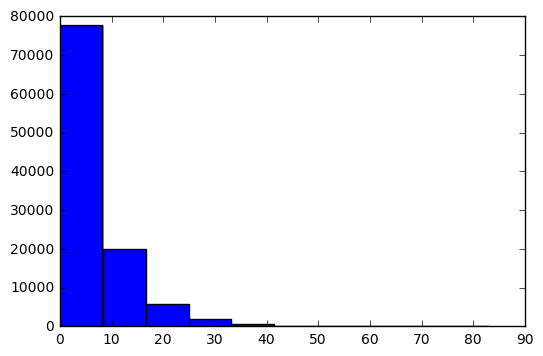

In [52]:
restaurants=smalldf.business_id.unique()
supports=[]
for i,rest1 in enumerate(restaurants):
    for j,rest2 in enumerate(restaurants):
        if  i < j:
            rest1_reviewers = smalldf[smalldf.business_id==rest1].user_id.unique()
            rest2_reviewers = smalldf[smalldf.business_id==rest2].user_id.unique()
            common_reviewers = set(rest1_reviewers).intersection(rest2_reviewers)
            supports.append(len(common_reviewers))
print "Mean support is:",np.mean(supports)
plt.hist(supports)

In [53]:
rest1_reviewers = smalldf[smalldf.business_id==rest1].user_id.unique()
rest2_reviewers = smalldf[smalldf.business_id==rest2].user_id.unique()
common_reviewers = set(rest1_reviewers).intersection(rest2_reviewers)

In [54]:
len(common_reviewers)

3

In [55]:
from scipy.stats.stats import pearsonr
def pearson_sim(rest1_reviews, rest2_reviews, n_common):
    """
    Given a subframe of restaurant 1 reviews and a subframe of restaurant 2 reviews,
    where the reviewers are those who have reviewed both restaurants, return 
    the pearson correlation coefficient between the user average subtracted ratings.
    The case for zero common reviewers is handled separately. Its
    ok to return a NaN if any of the individual variances are 0.
    """
    if n_common==0:
        rho=0.
    else:
        diff1=rest1_reviews['stars']-rest1_reviews['user_avg']
        diff2=rest2_reviews['stars']-rest2_reviews['user_avg']
        rho=pearsonr(diff1, diff2)[0]
    return rho

In [56]:
def get_restaurant_reviews(restaurant_id, df, set_of_users):
    """
    given a resturant id and a set of reviewers, return the sub-dataframe of their
    reviews.
    """
    mask = (df.user_id.isin(set_of_users)) & (df.business_id==restaurant_id)
    reviews = df[mask]
    reviews = reviews[reviews.user_id.duplicated()==False]
    return reviews

In [57]:
"""
Function
--------
calculate_similarity

Parameters
----------
rest1 : string
    The id of restaurant 1
rest2 : string
    The id of restaurant 2
df : DataFrame
  A dataframe of reviews, such as the smalldf above
similarity_func : func
  A function like pearson_sim above which takes two dataframes of individual
  restaurant reviews made by a common set of reviewers, and the number of
  common reviews. This function returns the similarity of the two restaurants
  based on the common reviews.
  
Returns
--------
A tuple
  The first element of the tuple is the similarity and the second the
  common support n_common. If the similarity is a NaN, set it to 0
"""
def calculate_similarity(rest1, rest2, df, similarity_func):
    # find common reviewers
    rest1_reviewers = df[df.business_id==rest1].user_id.unique()
    rest2_reviewers = df[df.business_id==rest2].user_id.unique()
    common_reviewers = set(rest1_reviewers).intersection(rest2_reviewers)
    n_common=len(common_reviewers)
    #get reviews
    rest1_reviews = get_restaurant_reviews(rest1, df, common_reviewers)
    rest2_reviews = get_restaurant_reviews(rest2, df, common_reviewers)
    sim=similarity_func(rest1_reviews, rest2_reviews, n_common)
    if np.isnan(sim):
        return 0, n_common
    return sim, n_common

In [58]:
class Database:
    "A class representing a database of similaries and common supports"
    
    def __init__(self, df):
        "the constructor, takes a reviews dataframe like smalldf as its argument"
        database={}
        self.df=df
        self.uniquebizids={v:k for (k,v) in enumerate(df.business_id.unique())}
        keys=self.uniquebizids.keys()
        l_keys=len(keys)
        self.database_sim=np.zeros([l_keys,l_keys])
        self.database_sup=np.zeros([l_keys, l_keys], dtype=np.int)
        
    def populate_by_calculating(self, similarity_func):
        """
        a populator for every pair of businesses in df. takes similarity_func like
        pearson_sim as argument
        """
        items=self.uniquebizids.items()
        for b1, i1 in items:
            for b2, i2 in items:
                if i1 < i2:
                    sim, nsup=calculate_similarity(b1, b2, self.df, similarity_func)
                    self.database_sim[i1][i2]=sim
                    self.database_sim[i2][i1]=sim
                    self.database_sup[i1][i2]=nsup
                    self.database_sup[i2][i1]=nsup
                elif i1==i2:
                    nsup=self.df[self.df.business_id==b1].user_id.count()
                    self.database_sim[i1][i1]=1.
                    self.database_sup[i1][i1]=nsup
                    

    def get(self, b1, b2):
        "returns a tuple of similarity,common_support given two business ids"
        sim=self.database_sim[self.uniquebizids[b1]][self.uniquebizids[b2]]
        nsup=self.database_sup[self.uniquebizids[b1]][self.uniquebizids[b2]]
        return (sim, nsup)

In [59]:
db=Database(smalldf)

In [60]:
db.populate_by_calculating(pearson_sim)

In [61]:
smalldf.user_id[20].encode('ascii','ignore')

'QJI9OSEn6ujRCtrX06vs1w'

In [62]:
smalldf['city'].value_counts()

Las Vegas    21957
Name: city, dtype: int64

In [63]:
smalldf.loc[smalldf['city'] == "Las Vegas"] #enter 2 businesses from the same city

,user_id,business_id,biz_name,business_review_count,business_average,user_name,user_review_count,stars,city,user_avg,review_id,business_avg
0,Q4Qfu-3vYtL1LRm2X1b0Gg,UV2Jt8slktGu14gLZeNCjA,Mint Indian Bistro,56,4.0,Albert,11,4,Las Vegas,3.636364,RKLvEr8RoW_SbkZARXk2Vg,4.214286
1,Q4Qfu-3vYtL1LRm2X1b0Gg,cJWbbvGmyhFiBpG_5hf5LA,Hofbräuhaus Las Vegas,83,3.5,Albert,11,4,Las Vegas,3.636364,7DVWEi4St40XUHSXGCr2kg,3.554217
2,Q4Qfu-3vYtL1LRm2X1b0Gg,dn_ipqbm7_jUz5X3rDez_A,Todd English P.U.B.,72,3.5,Albert,11,3,Las Vegas,3.636364,0VTpaU1BCuXY7pqupbf2Wg,3.527778
3,Q4Qfu-3vYtL1LRm2X1b0Gg,Cr4ipI-tr-R8Q0NilkWNkA,MIX,48,4.0,Albert,11,5,Las Vegas,3.636364,HxqqNenaxndZUSAw2evsUg,3.833333
4,Q4Qfu-3vYtL1LRm2X1b0Gg,Cni2l-VKG_pdospJ6xliXQ,Burger Bar,111,4.0,Albert,11,3,Las Vegas,3.636364,TMeS5fNPD53UmpL-szxdtQ,3.729730
5,Q4Qfu-3vYtL1LRm2X1b0Gg,U-zsJM-VN89i3PbaIbKmJw,The Pub at Monte Carlo,31,3.0,Albert,11,3,Las Vegas,3.636364,D47AkgTdvbQi3pYSgE9aeg,3.258065
6,Q4Qfu-3vYtL1LRm2X1b0Gg,VR8QvH2g-jEG5EfMzA_G9w,Nine Fine Irishmen,34,4.0,Albert,11,4,Las Vegas,3.636364,2XEG4jNajPU4lxKh_eVafw,3.705882
7,Q4Qfu-3vYtL1LRm2X1b0Gg,gTlDDzDEHyDQ6iwjNhpI6A,Mount Everest India's Cuisine,63,4.5,Albert,11,4,Las Vegas,3.636364,VVJwAeBHMLQ6V4Wo-LD_9g,4.000000
8,Q4Qfu-3vYtL1LRm2X1b0Gg,g62SlImzhs6_1t-knPjd8w,Red Square Restaurant & Vodka Lounge,22,4.0,Albert,11,3,Las Vegas,3.636364,e9x19_IrUKjyT3-6uXsLOA,3.454545
9,Q4Qfu-3vYtL1LRm2X1b0Gg,YZGSNhgTS6YeyUYoivD-Ww,Triple 7 Restaurant & Microbrewery,43,3.5,Albert,11,4,Las Vegas,3.636364,jiU5PUr2eIQSO9qgYP7DzA,3.744186


In [64]:
smalldf.business_id

0        UV2Jt8slktGu14gLZeNCjA
1        cJWbbvGmyhFiBpG_5hf5LA
2        dn_ipqbm7_jUz5X3rDez_A
3        Cr4ipI-tr-R8Q0NilkWNkA
4        Cni2l-VKG_pdospJ6xliXQ
5        U-zsJM-VN89i3PbaIbKmJw
6        VR8QvH2g-jEG5EfMzA_G9w
7        gTlDDzDEHyDQ6iwjNhpI6A
8        g62SlImzhs6_1t-knPjd8w
9        YZGSNhgTS6YeyUYoivD-Ww
10       g8OnV26ywJlZpezdBnOWUQ
11       xkVMIk_Vqh17f48ZQ_6b0w
12       4JNXUYY8wbaaDmk3BPzlWw
13       wpnLPAnkMEb1NpC3xiD_qg
14       CiYLq33nAyghFkUR15pP-Q
15       hIUKufhwR6Ifn7bi0-phLA
16       vl2IZrNJEA8npSjqXbdwxw
17       R6jpwPBe9edy0P64uyaLKA
18       qmIHO-6T_KEfPC9jyGDamQ
19       y8d90Pt16Nip-B5UXWBP-w
20       FLMxWQO-ckCQmGZhU9OQgw
21       makqSKZaz1aUipoWBW0BsA
22       DESv2ys6SjBKA4SyDtJvxw
23       lKq4Qsz13FDcAVgp49uukQ
24       DYuOxkW4DtlJsTHdxdXSlg
25       H_FkQxifSo13B2FWjhp36g
26       Mh84_j7YmRrAcm0DWV4bUw
27       5shgJB7a-2_gdnzc0gsOtg
28       wX1ORSDKPkA5ftE7F6UONw
29       Fy4t2XHIRKwMk_ocCZze0Q
                  ...          
21927   

In [65]:
db.get("VR8QvH2g-jEG5EfMzA_G9w", "K7lWdNUhCbcnEvI0NhGewg")

(-0.20205417177459603, 11)

In [66]:
def shrunk_sim(sim, n_common, reg=3.):
    "takes a similarity and shrinks it down by using the regularizer"
    ssim=(n_common*sim)/(n_common+reg)
    return ssim

In [67]:
"""
Function
--------
knearest

Parameters
----------
restaurant_id : string
    The id of the restaurant whose nearest neighbors we want
set_of_restaurants : array
    The set of restaurants from which we want to find the nearest neighbors
dbase : instance of Database class.
    A database of similarities, on which the get method can be used to get the similarity
  of two businessed. e.g. dbase.get(rid1,rid2)
k : int
    the number of nearest neighbors desired, default 7
reg: float
    the regularization.
    
  
Returns
--------
A sorted list
    of the top k similar restaurants. The list is a list of tuples
    (business_id, shrunken similarity, common support).
"""
from operator import itemgetter
def knearest(restaurant_id, set_of_restaurants, dbase, k=7, reg=3.):
    """
    Given a restaurant_id, dataframe, and database, get a sorted list of the
    k most similar restaurants from the entire database.
    """
    similars=[]
    for other_rest_id in set_of_restaurants:
        if other_rest_id!=restaurant_id:
            sim, nc=dbase.get(restaurant_id, other_rest_id)
            ssim=shrunk_sim(sim, nc, reg=reg)
            similars.append((other_rest_id, ssim, nc ))
    similars=sorted(similars, key=itemgetter(1), reverse=True)
    return similars[0:k]

In [ ]:
#import business.csv and get couple of different restaurants based on their business_id from smalldf

In [40]:
#business = pd.read_csv("C:/desktop/ml-project/yelp_academic_dataset/csv files/business.csv")

In [68]:
#smalldf.loc[smalldf['business_id'] == "bRntmjztJ4dFDA_LYiEECw"]

#smalldf.loc[smalldf['business_id'] == "J1RDyyPxhioqm8c_fi4P4Q"]

#smalldf.loc[smalldf['business_id'] == "4_EgrMY-EI-i-xyWixI2qg"]

#smalldf.loc[smalldf['business_id'] == "bRntmjztJ4dFDA_LYiEECw"]

In [ ]:
#Choose two very different businesses in the dataframe

In [69]:
smalldf.business_id

0        UV2Jt8slktGu14gLZeNCjA
1        cJWbbvGmyhFiBpG_5hf5LA
2        dn_ipqbm7_jUz5X3rDez_A
3        Cr4ipI-tr-R8Q0NilkWNkA
4        Cni2l-VKG_pdospJ6xliXQ
5        U-zsJM-VN89i3PbaIbKmJw
6        VR8QvH2g-jEG5EfMzA_G9w
7        gTlDDzDEHyDQ6iwjNhpI6A
8        g62SlImzhs6_1t-knPjd8w
9        YZGSNhgTS6YeyUYoivD-Ww
10       g8OnV26ywJlZpezdBnOWUQ
11       xkVMIk_Vqh17f48ZQ_6b0w
12       4JNXUYY8wbaaDmk3BPzlWw
13       wpnLPAnkMEb1NpC3xiD_qg
14       CiYLq33nAyghFkUR15pP-Q
15       hIUKufhwR6Ifn7bi0-phLA
16       vl2IZrNJEA8npSjqXbdwxw
17       R6jpwPBe9edy0P64uyaLKA
18       qmIHO-6T_KEfPC9jyGDamQ
19       y8d90Pt16Nip-B5UXWBP-w
20       FLMxWQO-ckCQmGZhU9OQgw
21       makqSKZaz1aUipoWBW0BsA
22       DESv2ys6SjBKA4SyDtJvxw
23       lKq4Qsz13FDcAVgp49uukQ
24       DYuOxkW4DtlJsTHdxdXSlg
25       H_FkQxifSo13B2FWjhp36g
26       Mh84_j7YmRrAcm0DWV4bUw
27       5shgJB7a-2_gdnzc0gsOtg
28       wX1ORSDKPkA5ftE7F6UONw
29       Fy4t2XHIRKwMk_ocCZze0Q
                  ...          
21927   

In [70]:
testbizid="cJWbbvGmyhFiBpG_5hf5LA"
testbizid2="wX1ORSDKPkA5ftE7F6UONw"
testbizid4="ZibmYdOPKLlqDM9oR6xzOA"
testbizid5="OJdufUU3hVabgviIBHksYw "#change the ids

In [71]:
#Functions to look up a business name given a business id, and a username given a user id.
def biznamefromid(df, theid):
    return df['biz_name'][df['business_id']==theid].values[0]
def usernamefromid(df, theid):
    return df['user_name'][df['user_id']==theid].values[0]

In [72]:
print testbizid, biznamefromid(smalldf,testbizid)
print testbizid2, biznamefromid(smalldf, testbizid2)
print testbizid4, biznamefromid(smalldf, testbizid4)

cJWbbvGmyhFiBpG_5hf5LA Hofbräuhaus Las Vegas
wX1ORSDKPkA5ftE7F6UONw Strip N Dip Chicken Strips
ZibmYdOPKLlqDM9oR6xzOA Bachi Burger


In [73]:
#top 10 matches
tops=knearest(testbizid, smalldf.business_id.unique(), db, k=10, reg=3.)
print "For ",biznamefromid(smalldf, testbizid), ", top matches are:"
for i, (biz_id, sim, nc) in enumerate(tops):
    print i,biznamefromid(smalldf,biz_id), "| Sim", sim, "| Support",nc #sim and support all zero

For  Hofbräuhaus Las Vegas , top matches are:
0 Grimaldi's - Coal Brick-Oven Pizzeria | Sim 0.616948931533 | Support 8
1 YOLOS | Sim 0.597281555361 | Support 5
2 Nine Fine Irishmen | Sim 0.584175281744 | Support 10
3 Brew Tea Bar | Sim 0.579847580715 | Support 7
4 Du-Par's | Sim 0.568337094542 | Support 7
5 Cravings Buffet | Sim 0.564261146766 | Support 6
6 Margaritaville - Las Vegas | Sim 0.556108278424 | Support 4
7 Koi Restaurant | Sim 0.543880562474 | Support 5
8 Kaizen Fusion Roll and Sushi | Sim 0.539969490488 | Support 4
9 L'Atelier de Joël Robuchon | Sim 0.528238367106 | Support 4


In [74]:
tops=knearest(testbizid2, smalldf.business_id.unique(), db, k=10, reg=3.)
print "For ",biznamefromid(smalldf, testbizid2), ", top matches are:"
for i, (biz_id, sim, nc) in enumerate(tops):
    print i,biznamefromid(smalldf,biz_id), "| Sim", sim, "| Support",nc

For  Strip N Dip Chicken Strips , top matches are:
0 Fleur by Hubert Keller | Sim 0.626008272482 | Support 11
1 DB Brasserie | Sim 0.617195583593 | Support 9
2 Javier's | Sim 0.594014378683 | Support 5
3 El Segundo Sol | Sim 0.580312140794 | Support 5
4 Marilyn's Cafe | Sim 0.571428571429 | Support 4
5 Lemongrass | Sim 0.569185972032 | Support 4
6 Mr. Lucky's 24-7 | Sim 0.549534389961 | Support 7
7 Pink Taco | Sim 0.528526150731 | Support 6
8 Nove Italiano | Sim 0.506879871304 | Support 4
9 Lola's A Louisana Kitchen | Sim 0.5015910003 | Support 18


In [75]:
tops=knearest(testbizid4, smalldf.business_id.unique(), db, k=10, reg=3.)
print "For ",biznamefromid(smalldf, testbizid4), ", top matches are:"
for i, (biz_id, sim, nc) in enumerate(tops):
    print i,biznamefromid(smalldf,biz_id), "| Sim", sim, "| Support",nc

For  Bachi Burger , top matches are:
0 Raising Cane's | Sim 0.602913183973 | Support 6
1 Benihana | Sim 0.597713649237 | Support 10
2 Picasso | Sim 0.596708068505 | Support 7
3 Sushi Kaya | Sim 0.595220063071 | Support 9
4 Vic & Anthony's Steakhouse | Sim 0.571428571429 | Support 4
5 Egg Works | Sim 0.546885912675 | Support 7
6 Veranda | Sim 0.536193939496 | Support 8
7 The Barrymore | Sim 0.524003975038 | Support 21
8 Brand Steakhouse | Sim 0.521954168985 | Support 8
9 The Capital Grille | Sim 0.507065677698 | Support 11


In [76]:
#smalldf.loc[smalldf['user_id'] == "2AOQ_9rtcyg7NvM3NeT6Cg"]

#smalldf.loc[smalldf['user_id'] == "Q4Qfu-3vYtL1LRm2X1b0Gg"]

#smalldf.loc[smalldf['user_id'] == "Yc3g0KMp3991QIC4Ot1fxQ"]

In [79]:
smalldf['user_id'].value_counts()

PKEzKWv_FktMm2mGPjwd0Q    251
bLbSNkLggFnqwNNzzq-Ijw    191
tH0uKD-vNwMoEc3Xk3Cbdg    181
N3oNEwh0qgPqPP3Em6wJXw    179
UYcmGbelzRa0Q6JqzLoguw    179
C2C0GPKvzWWnP57Os9eQ0w    177
U4INQZOPSUaj8hMjLlZ3KA    172
#NAME?                    172
8DEyKVyplnOcSKx39vatbg    165
n86B7IkbU20AkxlFX_5aew    165
qewG3X2O4X6JKskxyyqFwQ    154
kmE8w5Y785eZmodsx0V6Ag    139
eZZyuJDouIg4p-GYB3PV_A    138
3nDUQBjKyVor5wV0reJChg    131
oeAhRa8yFa9jtrhaHnOyxQ    130
TdYKJgSgY2GF_YJnwsi5yQ    128
ZsUSGU1-L1ImomLZjXxxTg    124
YMgZqBUAddmFErxLtCfK_w    121
JaqcCU3nxReTW2cBLHounA    115
epkRB3J_oBEiyiwahvdmGg    114
rt3PC7WCgCKsoufmQJELfw    104
8OeTLey-p-WaL9ErNEci1Q    104
53bZ_EsXH71L7iFs5MP9_w    100
hZfzVrhsCQ9JDAb2jYoJNQ     97
N044aCKJv3G5WuvwT5AJcA     97
o68A_3bAJTge-ioGXHdxKA     94
JXHrhT72U6sZJQSkFfNzjw     93
SfY0jEFqBkrqq9bVi6P31Q     93
YwaKGmRNnSa3R3N4Hf9jLw     92
h9RUaaHa5kcQKqtJ-sgS0Q     91
                         ... 
V7B4KTBitlBs9YH_B00-9Q      1
m1X96vPIYRja96l0O0G-3Q      1
4FXbovgSEF

In [78]:
#smalldf.loc[smalldf['user_id'] == "8bKpyXdiYF3ZKIB3QyEiVQ"]

In [80]:
#what are the top recommendations for a user?
def get_user_top_choices(user_id, df, numchoices=5):
    "get the sorted top 5 restaurants for a user by the star rating the user gave them"
    udf=df[df.user_id==user_id][['business_id','stars']].sort(['stars'], ascending=False).head(numchoices)
    return udf
#change user-ids
testuserid="QJI9OSEn6ujRCtrX06vs1w"
testuserid2="3l5lrs0_voc3cZz_UiLeZA"
testuserid3="JaqcCU3nxReTW2cBLHounA"
testuserid4=smalldf.user_id[1000].encode('ascii','ignore')
testuserid5=smalldf.user_id[250].encode('ascii','ignore')
print "For user", usernamefromid(smalldf,testuserid), "top choices are:" 
bizs=get_user_top_choices(testuserid, smalldf)['business_id'].values
[biznamefromid(smalldf, biz_id) for biz_id in bizs]

For user J top choices are:


/home/harika/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


['MGM Grand Hotel',
 'Carnival World Buffet',
 'Simon Restaurant and Lounge',
 'Veranda',
 'Hakkasan Nightclub']

In [81]:
print "For user", usernamefromid(smalldf,testuserid2), "top choices are:" 
bizs=get_user_top_choices(testuserid2, smalldf)['business_id'].values
[biznamefromid(smalldf, biz_id) for biz_id in bizs]

For user Christine top choices are:


/home/harika/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


['Brew Tea Bar',
 'Thai Style Noodle House',
 'MOzen Bistro',
 'The Boiling Crab',
 'Sambalatte Torrefazione']

In [82]:
print "For user", usernamefromid(smalldf,testuserid5), "top choices are:" 
bizs=get_user_top_choices(testuserid5, smalldf)['business_id'].values
[biznamefromid(smalldf, biz_id) for biz_id in bizs]

For user Paul top choices are:


/home/harika/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


['Veggie House',
 'KoMex Fusion',
 'Rollin Smoke Barbeque',
 "Leticia's Mexican Cocina",
 "John Mull's Meats & Road Kill Grill"]

In [83]:
#smalldf.loc[smalldf['user_id'] == "Q9mA60HnY87C1TW5kjAZ6Q"]

In [84]:
print "For user", usernamefromid(smalldf,testuserid4), "top choices are:" 
bizs=get_user_top_choices(testuserid4, smalldf)['business_id'].values
[biznamefromid(smalldf, biz_id) for biz_id in bizs]

For user Tien top choices are:


/home/harika/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


['Brio Tuscan Grille',
 'Sushi Kaya',
 'Lindo Michoacan',
 'Herbs & Rye',
 'Kona Grill']

In [85]:
"""
Function
--------
get_top_recos_for_user

Parameters
----------
userid : string
    The id of the user for whom we want the top recommendations
df : Dataframe
    The dataframe of restaurant reviews such as smalldf
dbase : instance of Database class.
    A database of similarities, on which the get method can be used to get the similarity
  of two businesses. e.g. dbase.get(rid1,rid2)
n: int
    the n top choices of the user by star rating
k : int
    the number of nearest neighbors desired, default 8
reg: float
    the regularization.
    
  
Returns
--------
A sorted list
    of the top recommendations. The list is a list of tuples
    (business_id, business_avg). You are combining the k-nearest recommendations 
    for each of the user's n top choices, removing duplicates and the ones the user
    has already rated.
"""
def get_top_recos_for_user(userid, df, dbase, n=5, k=7, reg=3.):
    bizs=get_user_top_choices(userid, df, numchoices=n)['business_id'].values
    rated_by_user=df[df.user_id==userid].business_id.values
    tops=[]
    for ele in bizs:
        t=knearest(ele, df.business_id.unique(), dbase, k=k, reg=reg)
        for e in t:
            if e[0] not in rated_by_user:
                tops.append(e)

    #there might be repeats. unique it
    ids=[e[0] for e in tops]
    uids={k:0 for k in list(set(ids))}

    topsu=[]
    for e in tops:
        if uids[e[0]] == 0:
            topsu.append(e)
            uids[e[0]] =1
    topsr=[]     
    for r, s,nc in topsu:
        avg_rate=df[df.business_id==r].stars.mean()
        topsr.append((r,avg_rate))
        
    topsr=sorted(topsr, key=itemgetter(1), reverse=True)

    if n < len(topsr):
        return topsr[0:n]
    else:
        return topsr

In [86]:
print "For user", usernamefromid(smalldf,testuserid), "the top recommendations are:"
toprecos=get_top_recos_for_user(testuserid, smalldf, db, n=5, k=7, reg=3.)
for biz_id, biz_avg in toprecos:
    print biznamefromid(smalldf,biz_id), "| Average Rating |", biz_avg # why no recommendations

For user J the top recommendations are:
L'Atelier de Joël Robuchon | Average Rating | 4.37037037037
Yellowtail | Average Rating | 4.3
Island Style | Average Rating | 4.24242424242
Yummy Grill & Sushi | Average Rating | 4.17741935484
Vic & Anthony's Steakhouse | Average Rating | 4.13043478261


/home/harika/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [87]:
print "For user", usernamefromid(smalldf,testuserid2), "the top recommendations are:"
toprecos=get_top_recos_for_user(testuserid2, smalldf, db, n=5, k=7, reg=3.)
for biz_id, biz_avg in toprecos:
    print biznamefromid(smalldf,biz_id), "| Average Rating |", biz_avg

For user Christine the top recommendations are:
Joël  Robuchon | Average Rating | 4.44827586207
Estiatorio Milos | Average Rating | 4.31034482759
Gordon Ramsay Steak | Average Rating | 4.28125
Jean Philippe Patisserie | Average Rating | 4.07407407407
In-N-Out Burger | Average Rating | 4.0625


/home/harika/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [88]:
print "For user", usernamefromid(smalldf,testuserid3), "the top recommendations are:"
toprecos=get_top_recos_for_user(testuserid3, smalldf, db, n=5, k=7, reg=3.)
for biz_id, biz_avg in toprecos:
    print biznamefromid(smalldf,biz_id), "| Average Rating |", biz_avg

For user David the top recommendations are:
Kabuto | Average Rating | 4.75555555556
L'Atelier de Joël Robuchon | Average Rating | 4.37037037037
The Capital Grille | Average Rating | 4.2972972973
Vic & Anthony's Steakhouse | Average Rating | 4.13043478261
THE Steak House | Average Rating | 4.11111111111


/home/harika/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [89]:
print "For user", usernamefromid(smalldf,testuserid4), "the top recommendations are:"
toprecos=get_top_recos_for_user(testuserid4, smalldf, db, n=5, k=7, reg=3.)
for biz_id, biz_avg in toprecos:
    print biznamefromid(smalldf,biz_id), "| Average Rating |", biz_avg

For user Tien the top recommendations are:
Lawry's The Prime Rib | Average Rating | 4.30612244898
Le Cirque | Average Rating | 4.25
AquaKnox | Average Rating | 4.22222222222
Cornish Pasty | Average Rating | 4.08333333333
Jean Philippe Patisserie | Average Rating | 4.07407407407


/home/harika/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [90]:
print "For user", usernamefromid(smalldf,testuserid5), "the top recommendations are:"
toprecos=get_top_recos_for_user(testuserid5, smalldf, db, n=5, k=7, reg=3.)
for biz_id, biz_avg in toprecos:
    print biznamefromid(smalldf,biz_id), "| Average Rating |", biz_avg

For user Paul the top recommendations are:
Yonaka Modern Japanese | Average Rating | 4.64516129032
Nobu | Average Rating | 4.37837837838
MTO Café | Average Rating | 4.26666666667
MOzen Bistro | Average Rating | 4.16666666667
Tableau | Average Rating | 4.15789473684


/home/harika/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [ ]:
#something wrong everyone has same recommendations

In [ ]:
#part two :  which items seem the most similar to this user. A user based recommender with predicted ratings

In [91]:
"""
Function
--------
knearest_amongst_userrated

Parameters
----------
restaurant_id : string
    The id of the restaurant whose nearest neighbors we want
user_id : string
    The id of the user, in whose reviewed restaurants we want to find the neighbors
df: Dataframe
    The dataframe of reviews such as smalldf
dbase : instance of Database class.
    A database of similarities, on which the get method can be used to get the similarity
  of two businessed. e.g. dbase.get(rid1,rid2)
k : int
    the number of nearest neighbors desired, default 7
reg: float
    the regularization.
    
  
Returns
--------
A sorted list
    of the top k similar restaurants. The list is a list of tuples
    (business_id, shrunken similarity, common support).
"""
def knearest_amongst_userrated(restaurant_id, user_id, df, dbase, k=7, reg=3.):
    dfuser=df[df.user_id==user_id]
    bizsuserhasrated=dfuser.business_id.unique()
    return knearest(restaurant_id, bizsuserhasrated, dbase, k=k, reg=reg)

In [93]:
"""
Function
--------
rating

Parameters
----------
df: Dataframe
    The dataframe of reviews such as smalldf
dbase : instance of Database class.
    A database of similarities, on which the get method can be used to get the similarity
  of two businessed. e.g. dbase.get(rid1,rid2)
restaurant_id : string
    The id of the restaurant whose nearest neighbors we want
user_id : string
    The id of the user, in whose reviewed restaurants we want to find the neighbors
k : int
    the number of nearest neighbors desired, default 7
reg: float
    the regularization.
    
  
Returns
--------
A float
    which is the impued rating that we predict that user_id will make for restaurant_id
"""
def rating(df, dbase, restaurant_id, user_id, k=7, reg=3.):
    mu=df.stars.mean()
    users_reviews=df[df.user_id==user_id]
    nsum=0.
    scoresum=0.
    nears=knearest_amongst_userrated(restaurant_id, user_id, df, dbase, k=k, reg=reg)
    restaurant_mean=df[df.business_id==restaurant_id].business_avg.values[0]
    user_mean=users_reviews.user_avg.values[0]
    scores=[]
    for r,s,nc in nears:
        scoresum=scoresum+s
        scores.append(s)
        r_reviews_row=users_reviews[users_reviews['business_id']==r]
        r_stars=r_reviews_row.stars.values[0]
        r_avg=r_reviews_row.business_avg.values[0]
        rminusb=(r_stars - (r_avg + user_mean - mu))
        nsum=nsum+s*rminusb
    baseline=(user_mean +restaurant_mean - mu)
    #we might have nears, but there might be no commons, giving us a pearson of 0
    if scoresum > 0.:
        val =  nsum/scoresum + baseline
    else:
        val=baseline
    return val

In [94]:
print "User Average", smalldf[smalldf.user_id==testuserid].stars.mean(),"for",usernamefromid(smalldf,testuserid)
print "Predicted ratings for top choices calculated earlier:"
for biz_id,biz_avg in toprecos:
    print biznamefromid(smalldf, biz_id),"|",rating(smalldf, db, biz_id, testuserid, k=7, reg=3.),"|","Average",biz_avg

User Average 3.81944444444 for J
Predicted ratings for top choices calculated earlier:
Yonaka Modern Japanese | 4.67234583985 | Average 4.64516129032
Nobu | 4.55622583692 | Average 4.37837837838
MTO Café | 4.94682831357 | Average 4.26666666667
MOzen Bistro | 4.22006229816 | Average 4.16666666667
Tableau | 4.12161065082 | Average 4.15789473684


In [95]:
print "User Average", smalldf[smalldf.user_id==testuserid2].stars.mean(),"for",usernamefromid(smalldf,testuserid2)
print "Predicted ratings for top choices calculated earlier:"
for biz_id,biz_avg in toprecos:
    print biznamefromid(smalldf, biz_id),"|",rating(smalldf, db, biz_id, testuserid2, k=7, reg=3.),"|","Average",biz_avg

User Average 3.27272727273 for Christine
Predicted ratings for top choices calculated earlier:
Yonaka Modern Japanese | 4.3427599289 | Average 4.64516129032
Nobu | 4.1981231433 | Average 4.37837837838
MTO Café | 3.43522535761 | Average 4.26666666667
MOzen Bistro | 4.0122399735 | Average 4.16666666667
Tableau | 3.44094980388 | Average 4.15789473684


In [96]:
print "User Average", smalldf[smalldf.user_id==testuserid3].stars.mean(),"for",usernamefromid(smalldf,testuserid3)
print "Predicted ratings for top choices calculated earlier:"
for biz_id,biz_avg in toprecos:
    print biznamefromid(smalldf, biz_id),"|",rating(smalldf, db, biz_id, testuserid3, k=7, reg=3.),"|","Average",biz_avg

User Average 3.64347826087 for David
Predicted ratings for top choices calculated earlier:
Yonaka Modern Japanese | 4.30358867109 | Average 4.64516129032
Nobu | 3.94380906161 | Average 4.37837837838
MTO Café | 4.04461591691 | Average 4.26666666667
MOzen Bistro | 3.93273856323 | Average 4.16666666667
Tableau | 3.76797828942 | Average 4.15789473684


In [97]:
print "User Average", smalldf[smalldf.user_id==testuserid4].stars.mean(),"for",usernamefromid(smalldf,testuserid4)
print "Predicted ratings for top choices calculated earlier:"
for biz_id,biz_avg in toprecos:
    print biznamefromid(smalldf, biz_id),"|",rating(smalldf, db, biz_id, testuserid4, k=7, reg=3.),"|","Average",biz_avg

User Average 3.95384615385 for Tien
Predicted ratings for top choices calculated earlier:
Yonaka Modern Japanese | 5.05437265859 | Average 4.64516129032
Nobu | 4.62583821245 | Average 4.37837837838
MTO Café | 4.24558837112 | Average 4.26666666667
MOzen Bistro | 4.59120210179 | Average 4.16666666667
Tableau | 4.35851009173 | Average 4.15789473684


In [98]:
print "User Average", smalldf[smalldf.user_id==testuserid5].stars.mean(),"for",usernamefromid(smalldf,testuserid5)
print "Predicted ratings for top choices calculated earlier:"
for biz_id,biz_avg in toprecos:
    print biznamefromid(smalldf, biz_id),"|",rating(smalldf, db, biz_id, testuserid5, k=7, reg=3.),"|","Average",biz_avg

User Average 3.84782608696 for Paul
Predicted ratings for top choices calculated earlier:
Yonaka Modern Japanese | 5.17937182482 | Average 4.64516129032
Nobu | 4.69148299799 | Average 4.37837837838
MTO Café | 4.62064208657 | Average 4.26666666667
MOzen Bistro | 4.07253158081 | Average 4.16666666667
Tableau | 4.60795215128 | Average 4.15789473684


In [ ]:
#testing

In [105]:
smalldf.columns

Index([u'user_id', u'business_id', u'biz_name', u'business_review_count',
       u'business_average', u'user_name', u'user_review_count', u'stars',
       u'city', u'user_avg', u'review_id', u'business_avg'],
      dtype='object')

In [107]:
def get_other_ratings(restaurant_id, user_id, df):
    "get a user's rating for a restaurant and the restaurant's average rating"
    choice=df[(df.business_id==restaurant_id) & (df.user_id==user_id)]
    users_score=choice.stars.values[0]
    average_score=choice.business_avg.values[0]
    return users_score, average_score

In [108]:
print "for user",usernamefromid(smalldf,testuserid), 'avg', smalldf[smalldf.user_id==testuserid].stars.mean() 
for biz_id in bizs:
    print "----------------------------------"
    print biznamefromid(smalldf, biz_id)
    print "Predicted Rating:",rating(smalldf, db, biz_id, testuserid, k=7, reg=3.) 
    u,a=get_other_ratings(biz_id, testuserid, smalldf)
    print "Actual User Rating:",u,"Avg Rating",a

for user J avg 3.81944444444
----------------------------------
Brio Tuscan Grille
Predicted Rating: 4.11392116842
Actual User Rating: 4 Avg Rating 3.70796460177
----------------------------------
Sushi Kaya
Predicted Rating: 3.35433280258


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
#error analysis

In [93]:
def compare_results(stars_actual, stars_predicted, ylow=-10, yhigh=15, title=""):
    """
    plot predicted results against actual results. Takes 2 arguments: a
    numpy array of actual ratings and a numpy array of predicted ratings
    scatterplots the predictions, a unit slope line, line segments joining the mean,
    and a filled in area of the standard deviations."
    """
    fig=plt.figure()
    df=pd.DataFrame(dict(actual=stars_actual, predicted=stars_predicted))
    ax=plt.scatter(df.actual, df.predicted, marker = '.', alpha=0.2, s=30, label="predicted")
    plt.ylim([ylow,yhigh])
    plt.plot([1,5],[1,5], label="slope 1")
    xp=[1,2,3,4,5]
    yp=df.groupby('actual').predicted.mean().values
    plt.plot(xp,yp,'k', label="means")
    sig=df.groupby('actual').predicted.std().values
    plt.fill_between(xp, yp - sig, yp + sig, 
                 color='k', alpha=0.2)
    plt.xlabel("actual")
    plt.ylabel("predicted")
    plt.legend(frameon=False)
    remove_border()
    plt.grid(False)
    plt.title(title)
    print np.mean(np.abs(df.predicted) < 15)